In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

In [2]:
# Betrouwbaarheidsinterval
# norm.cdf(y, loc = µ, scale = σ)   - norm.cdf(x, loc = µ, scale= σ)
# norm.cdf(µ-2*σ, loc = µ, scale = σ)   - norm.cdf(µ+2*σ, loc = µ, scale= σ)

In [ ]:
# Andere Betrouwbaarheidsintervallen
# norm.ppf(q=(1+p)/2)

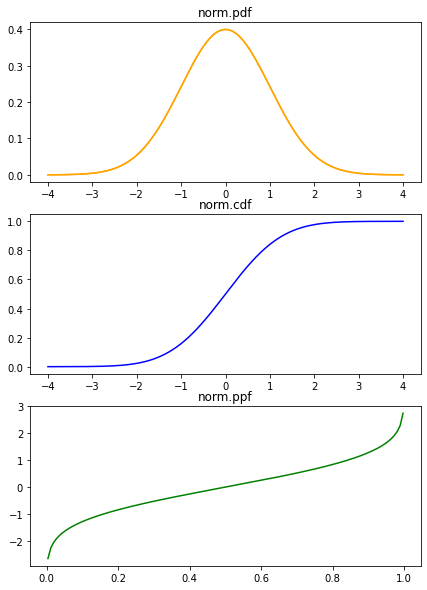

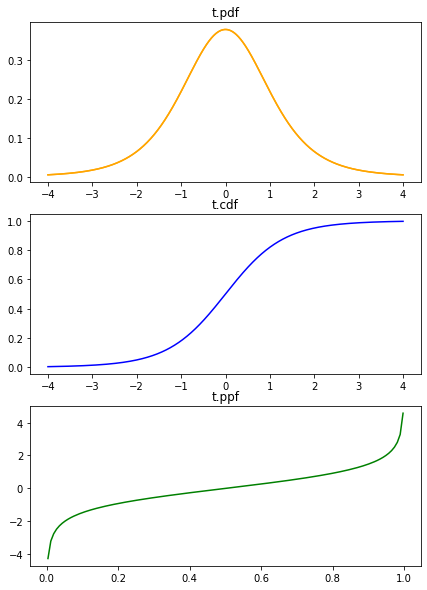

In [64]:
# Samenvatting functies
def draw(ax, f, title, color, df=None):
    if df:
        y = f(x, df)
    else:
        y = f(x)
    ax.plot(x, y, c=color)
    ax.set_title(title)


f = np.vectorize(draw)
fig, axes = plt.subplots(3, 1, figsize=(7, 10))
x = np.linspace(-4, 4, num=1000)
_ = f(axes, [norm.pdf, norm.cdf, norm.ppf], ['norm.pdf', 'norm.cdf', 'norm.ppf'], ['orange', 'blue', 'green'])
fig, axes = plt.subplots(3, 1, figsize=(7, 10))
x = np.linspace(-4, 4, num=1000)
_ = f(axes, [t.pdf, t.cdf, t.ppf], ['t.pdf', 't.cdf', 't.ppf'], ['orange', 'blue', 'green'], [5, 5, 5])

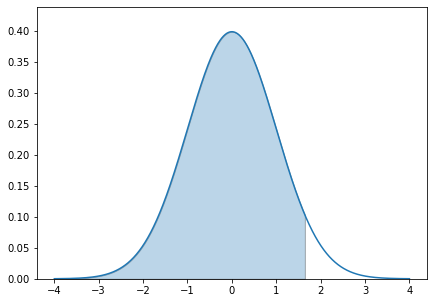

In [3]:
# Samenvatting functies
fig, ax = plt.subplots(figsize=(7, 5))
x = np.linspace(-4, 4, num=1000)
x1 = np.linspace(-4, norm.ppf(0.95), num=1000)
ax.plot(x, norm.pdf(x))
ax.set_ylim(0, max(norm.pdf(x)) * 1.1)
_ = ax.fill_between(x1, norm.pdf(x1), alpha=0.3, edgecolor='black')

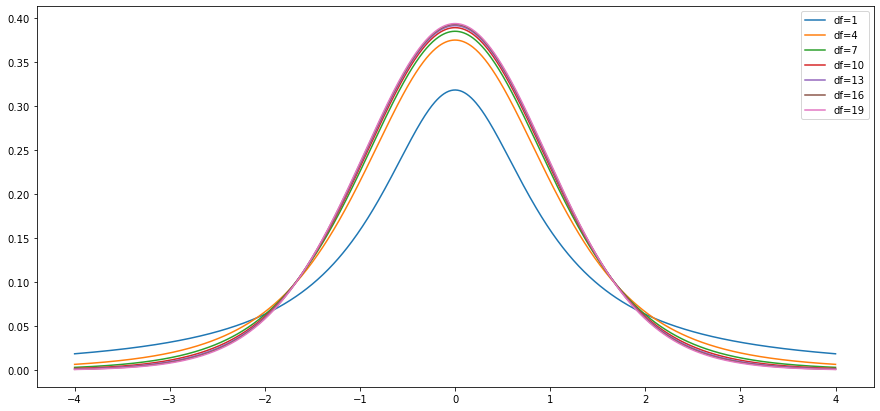

In [10]:
# Student-verdeling
fig, ax = plt.subplots(figsize=(15, 7))
x = np.linspace(-4, 4, num=1000)
for i in range(1, 20, 3):
    ax.plot(x, t.pdf(x, df=i), label='df={}'.format(i))
_ = ax.legend()

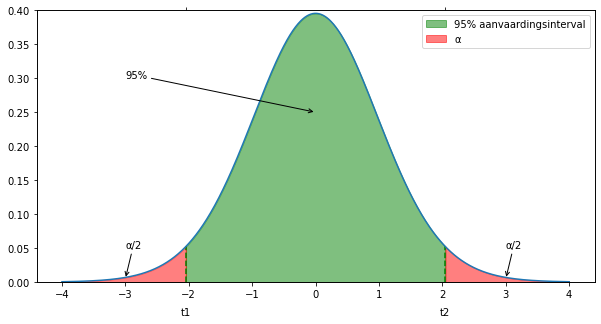

In [54]:
# Student-verdeling
fig, ax = plt.subplots(figsize=(10, 5))
x1 = np.linspace(-4, 4, num=1000)
p = 0.95
a = 1 - p
n = 30
t1 = t.ppf(q=a / 2, df=n - 1)
t2 = t.ppf(q=1 - a / 2, df=n - 1)
x2 = np.linspace(t1, t2, num=100)
x3 = np.linspace(-4, t1, num=100)
x4 = np.linspace(t2, 4, num=100)
ax.plot(x1, t.pdf(x1, df=n - 1))
ax.vlines(t1, ymin=0, ymax=t.pdf(t1, df=n - 1), color='green', linestyle='--')
ax.vlines(t2, ymin=0, ymax=t.pdf(t2, df=n - 1), color='green', linestyle='--')
ax.set_ylim(0, 0.4)
ax.fill_between(x2, t.pdf(x2, df=n - 1), color='green', alpha=0.5, label='95% aanvaardingsinterval')
ax.fill_between(x3, t.pdf(x3, df=n - 1), color='red', alpha=0.5, label='α')
ax.fill_between(x4, t.pdf(x4, df=n - 1), color='red', alpha=0.5)
ax.annotate('95%', xy=(0, 0.25), xytext=(-3, 0.3), arrowprops=dict(arrowstyle="->"))
ax.annotate('α/2', xy=(-3, 0.005), xytext=(-3, 0.05), arrowprops=dict(arrowstyle="->"))
ax.annotate('α/2', xy=(3, 0.005), xytext=(3, 0.05), arrowprops=dict(arrowstyle="->"))
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([t1, t2])
ax2.set_xticklabels(['t1', 't2'])
ax2.tick_params(axis='x', pad=-310)
_ = ax.legend()

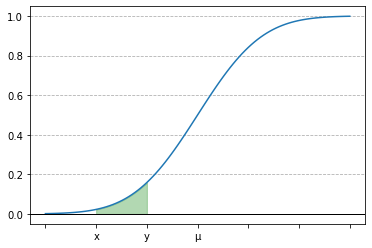

In [72]:
# Slide 5
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)
x = np.linspace(120, 240, 100)
x2 = np.linspace(140, 160, num=100)

ax.plot(x, norm.cdf(x, loc=180, scale=20))
ax.axhline(0, color='black', linewidth=1)
ax.grid(linestyle='--', axis='y')
ax.fill_between(x2, norm.cdf(x2, loc=180, scale=20), color='green', alpha=0.3)
#_ = ax.set_xticklabels(['', 'μ - 3σ', 'μ - 2σ','μ - 1σ','μ','μ + 1σ','μ + 2σ','μ + 3σ',''])
_ = ax.set_xticklabels(['', '', 'x', 'y', 'μ', '', '', '', ''])


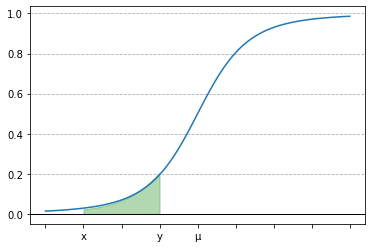

In [82]:
# Slide 6
from scipy.stats import t

fig, ax = plt.subplots(1, 1)
x = np.linspace(-4, 4, 100)
x2 = np.linspace(-3, -1, num=100)

ax.plot(x, t.cdf(x, df=3))
ax.axhline(0, color='black', linewidth=1)
ax.grid(linestyle='--', axis='y')
ax.fill_between(x2, t.pdf(x2, df=3), color='green', alpha=0.3)
# _ = ax.set_xticklabels(['','', 'μ - 3σ', 'μ - 2σ','μ - 1σ','μ','μ + 1σ','μ + 2σ','μ + 3σ','',''])
_ = ax.set_xticklabels(['', '', 'x', '', 'y', 'μ', '', '', '', '', ''])


In [91]:
# Slide 13 : Grenswaarde alfa bepalen
# Als mu0 = 40 dan is de uiterst grens bepaalt door steekproefgemiddelde 43
t2 = (43 - 40) / (10 / np.sqrt(50))
t2 = 2.121
a = 2 * (1 - t.cdf(2.121, df=49))
a

0.0390063389158779

In [40]:
# Slide 15: P-value
# we creëren een sample die effectief een gemiddelde van 43 en sd van 10 heeft
from scipy.stats import ttest_1samp

screens = np.random.normal(loc=43, scale=10, size=50)
x_bar = np.mean(screens)
sd = np.std(screens)
z_screens = (screens - x_bar) / sd
screens = (z_screens * 10 + 43)
t, p_value = ttest_1samp(screens, 40)
print('{:.3f} {:.3f}'.format(t, p_value))

2.100 0.041


In [1]:
# Slide 29
from scipy.stats import chisquare
import numpy as np

fo = np.array([15, 3, 7, 5])
fe = np.array([9, 3, 9, 9])

X = np.sum((fo - fe) ** 2 / fe)

chisquare(f_obs=fo, f_exp=fe)

Power_divergenceResult(statistic=6.222222222222222, pvalue=0.10128520246221875)

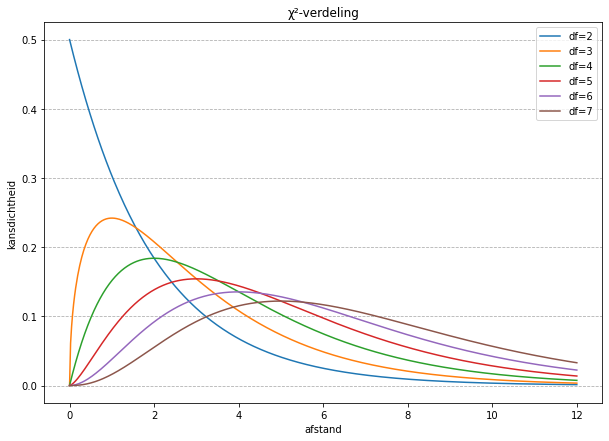

In [68]:
from scipy.stats import chi2

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
x = np.linspace(0, 12, 500)
for m in range(3, 9, 1):
    ax.plot(x, chi2.pdf(x, df=m - 1), label='df={}'.format(m - 1))
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('afstand')
ax.set_ylabel('kansdichtheid')
ax.set_title('χ²-verdeling')
_ = ax.legend()

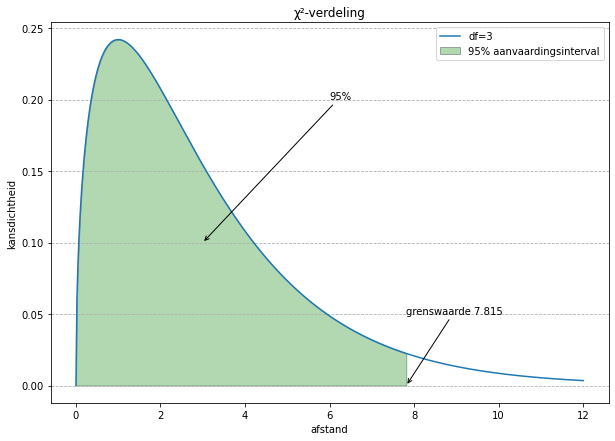

In [77]:
# Slide 31
from scipy.stats import chi2

a = 0.05
m = 4
t = chi2.ppf(1 - a, df=m - 1)
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
x = np.linspace(0, 12, 500)
x1 = np.linspace(0, t, 500)
ax.plot(x, chi2.pdf(x, df=m - 1), label='df={}'.format(m - 1))
ax.fill_between(x1, chi2.pdf(x1, df=m - 1), color='green', alpha=0.3, edgecolor='black',
                label='95% aanvaardingsinterval'.format(m))
ax.annotate('95%', xy=(3, 0.1), xytext=(6, 0.2), arrowprops=dict(arrowstyle="->"))
ax.annotate('grenswaarde {:.3f}'.format(t), xy=(t, 0), xytext=(t, 0.05), arrowprops=dict(arrowstyle="->"))
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('afstand')
ax.set_ylabel('kansdichtheid')
ax.set_title('χ²-verdeling')
_ = ax.legend()